In [ ]:
# Imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sma
import statistics

from pandas import DataFrame
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read csv file 'churn_clean.csv'
df = pd.read_csv('churn_clean.csv')

In [ ]:
# Check first 5 rows to make sure all columns are named
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [ ]:
# Rename all survey questions to approiate name
df.rename(columns={
    'Item1' : 'Timely response',
    'Item2' : 'Timely fixes',
    'Item3' : 'Timely replacements',
    'Item4' : 'Reliability',
    'Item5' : 'Options',
    'Item6' : 'Respectful response',
    'Item7' : 'Courteous exchange',
    'Item8' : 'Evidence of active listening',
}, inplace = True) 


In [ ]:
# Check if rename took effect and saved
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [ ]:
# Describe the data
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [ ]:
#Built two tables just for learning purposes

In [ ]:
# Build a table for 2 or more variables also know as a contingency table
continTable = pd.crosstab(df['Churn'], df['Timely response'])
continTable # recall variable to print to screen

Timely response,1,2,3,4,5,6,7
Churn,,,,,,,
No,158,1002,2562,2473,994,146,15
Yes,66,391,886,885,365,53,4


In [ ]:
# Build a table for 2 or more variables also know as a contingency table
continTable2 = pd.crosstab(df['Churn'], df['Timely fixes'])
continTable2 # recall variable to print to screen

Timely fixes,1,2,3,4,5,6,7
Churn,,,,,,,
No,160,973,2519,2507,1025,155,11
Yes,57,387,896,905,343,60,2


In [ ]:
# Build table of two variables and give percentange of the data and normalize 
continTablePercentage = pd.crosstab(df['Churn'], df['Timely response'] , normalize='index') 
continTablePercentage

Timely response,1,2,3,4,5,6,7
Churn,,,,,,,
No,0.021497,0.136327,0.348571,0.336463,0.135238,0.019864,0.002041
Yes,0.024906,0.147547,0.334340,0.333962,0.137736,0.020000,0.001509


In [ ]:
# Build table of two variables and give percentange of the data and normalize 
continTablePercentage2 = pd.crosstab(df['Churn'], df['Timely fixes'] , normalize='index') 
continTablePercentage2

Timely fixes,1,2,3,4,5,6,7
Churn,,,,,,,
No,0.021769,0.132381,0.342721,0.341088,0.139456,0.021088,0.001497
Yes,0.021509,0.146038,0.338113,0.341509,0.129434,0.022642,0.000755


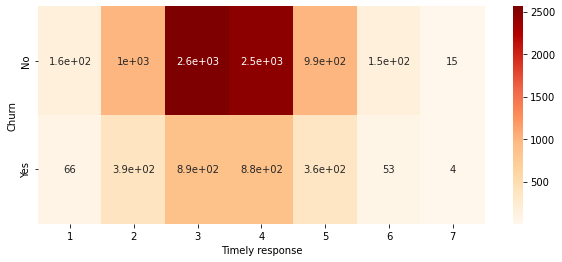

In [ ]:
# Vizualize the table in heatmap for Timely response
plt.figure(figsize=(10,4))
sns.heatmap(continTable, annot=True, cmap='OrRd')


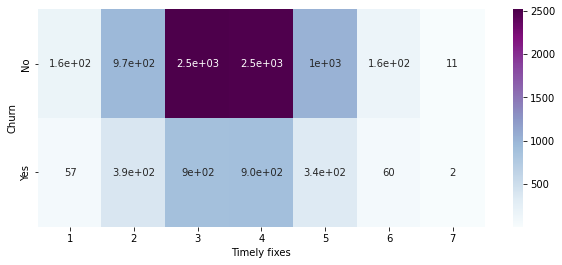

In [ ]:
# Vizualize the table in heatmap for Timely fixes
plt.figure(figsize=(10,4))
sns.heatmap(continTable2, annot=True, cmap='BuPu')


In [ ]:
# Chi-Square Testing
chi, p, dof, expected = chi2_contingency(continTable)
print('Chi ' + str(chi))
print('P-Value ' + str(p))
print('DOF ' + str(dof))
print('Expected ' + str(expected))

Chi 4.332077523616339
P-Value 0.6318335816054494
DOF 6
Expected [[ 164.64  1023.855 2534.28  2468.13   998.865  146.265   13.965]
 [  59.36   369.145  913.72   889.87   360.135   52.735    5.035]]


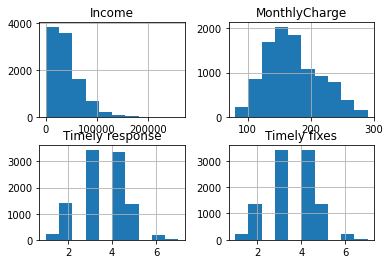

In [ ]:
# Create a histogram of columns and save those to churn_histplot.jpg for continuous and categorical
df[['Income', 'MonthlyCharge', 'Timely response', 'Timely fixes']].hist()
plt.tight_layout
plt.savefig('churn_histplot.jpg')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

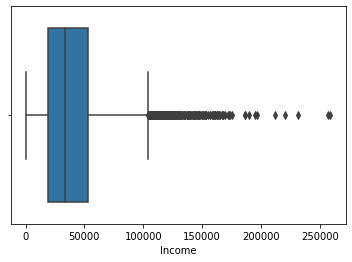

In [ ]:
# Create box plot for all columns for continuous and categorical 
# Income
sns.boxplot('Income', data=df)
plt.show


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

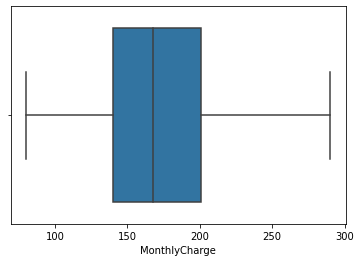

In [ ]:
# Create box plot for all columns for continuous and categorical 
# MonthlyCharge
sns.boxplot('MonthlyCharge', data=df)
plt.show


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

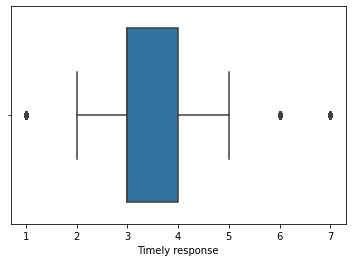

In [ ]:
# Create box plot for all columns for continuous and categorical 
# Timely response
sns.boxplot('Timely response', data=df)
plt.show


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

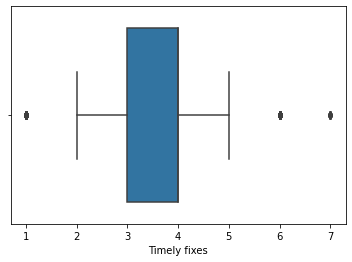

In [ ]:
# Create box plot for all columns for continuous and categorical 
# Timely fixes
sns.boxplot('Timely fixes', data=df)
plt.show


In [ ]:
# Bivariate analysis of correlation using colums
# Income, MonthlyCharges, Timely reponse, and Timely fixes
biVarDf = df[['Income', 'MonthlyCharge', 'Timely response', 'Timely fixes']]

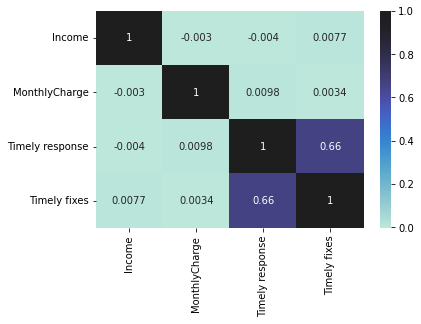

In [ ]:
# Create a heatmap to show correclation of the columns for bivariate
sns.heatmap(biVarDf.corr(), annot=True, center=1)
plt.show()

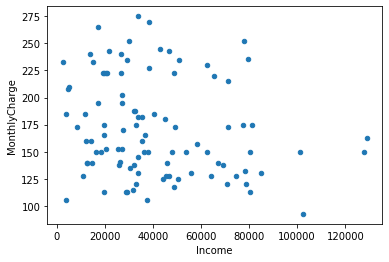

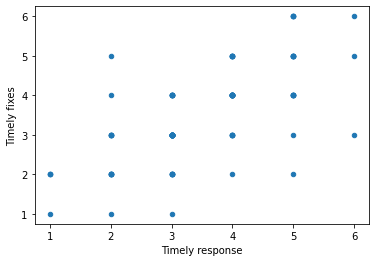

In [ ]:
#Scatter plot for bivariate
biVarDf[biVarDf['Income'] <260000].sample(100).plot.scatter(x='Income', y='MonthlyCharge')
biVarDf[biVarDf['Timely response'] < 9].sample(100).plot.scatter(x='Timely response', y='Timely fixes')

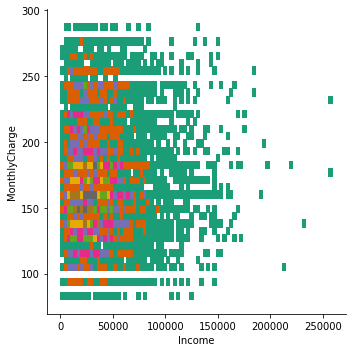

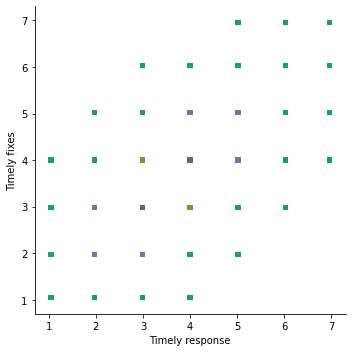

In [ ]:
sns.displot(biVarDf, x='Income', y='MonthlyCharge', cmap='Dark2')
sns.displot(biVarDf, x='Timely response', y='Timely fixes', cmap='Dark2')

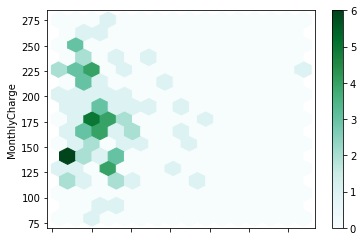

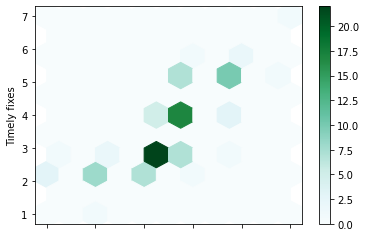

In [ ]:
biVarDf[biVarDf['Income'] <260000].sample(100).plot.hexbin(x='Income', y='MonthlyCharge', gridsize=15)
biVarDf[biVarDf['Timely response'] < 9].sample(100).plot.hexbin(x='Timely response', y='Timely fixes', gridsize=10)